# Analysis of Customer Churn prediction in Logistic Industry

## VARIABLES CONSIDERED FOR ANALYSIS  
The following variables are considered for the analysis: 

•**	Customer ID: ** The five digits unique identifier representing a customer. 

•**	LastInvoiceDate: ** The format is DD-MM-YYYY. The date on which an invoice for a good is issued, which is usually the same day the good is sent to the buyer. 

•**	AvgInvoiceAmount: ** An average amount of invoice, bill or tab, which is a commercial document, issued by a seller to a buyer, relating to a sale transaction and indicating the products, quantities, and agreed prices for products or services the seller had provided the customer.

•**	LocationName: ** The name of a geographical location, such as states and city, the first term is name/abbreviation of the city and term after punctuation is the name of the state of the region customer belongs. 

•**	Zip: ** a postal code consisting of five digits of the region customer belongs.  

•**	AvgMiles: ** The distance on the average travelled by a Logistics service provider.

•**	NoCalls: ** Number of Calls being made by the customer regarding any queries and complaints. 

•**	ClaimsMade: ** Number of claims made which are the policies providing coverage that are triggered when a claim is made against the insured during the policy period, regardless of when the wrongful act that gave rise to the claim took place

•**	DelayedQuote: ** A stock or other quotes that are reported some time after the transaction takes place where 0 represents “No Delayed Quote” and 1 represents “Delayed Quote”.

•**	PickupDelay: ** Number of delays happened during pickups where 0 represents “No Pickup Delay” and 1 represents “Pickup Delay”.

•**	DeliveryDelay: ** Number of shipments arrived later than the time that they were scheduled to arrive where 0 represents “No Delay” and 1 represents “Delay”. 

•**	VolumeChange: ** The tendency of matter to change in volume with response to a change in temperature where 0 represents “No Change” and 1 represents “Some Change”.

•**	PriceChangedPostQuote: ** A quote (or quotation) is an exact price for the job being offered. As such it is fixed and cannot be changed once it has been accepted by the customer unless the customer changes the amount/type of work required or you discover something completely outside of the scope of what was agreed where 0 represents “No Price Change” and 1 represents “Price Changed post Quote”.

•**	CompetitorsPresent: ** Whether there is any person or entity which is a rival against another where 0 represents “No Competitors Present” and 1 represents “Competitors are Present”.

•**	CurrentInflation: ** Whether there is an increase in the cost of living as the price of goods and services rise, where 0 represents “No Current Inflation” and 1 represents “Current Inflation has happened”.

•**	Customer Churn: ** This variable indicates whether the customers have “churned” or not.  The victory the Supreme Court provided the petitioning party may not have been total and complete.


In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [143]:
data = pd.read_csv('customer_data.csv')

In [144]:
data.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation
0,26342,1,05-Aug-14,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1
1,38851,0,17-Oct-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1
2,32312,0,31-Mar-16,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1
3,46203,0,17-Mar-14,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0
4,12234,0,05-May-14,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1


##### Data Formats

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
Customer Id              600 non-null int64
CustomerChurn            600 non-null int64
LastInvoiceDate          600 non-null object
AvgInvoiceAmount         600 non-null int64
LocationName             600 non-null object
Zip                      600 non-null int64
AvgMiles                 600 non-null float64
NoCalls                  600 non-null int64
ClaimsMade               600 non-null int64
DelayedQuote             600 non-null int64
PickupDelay              600 non-null int64
DeliveryDelay            600 non-null int64
VolumeChange             600 non-null int64
PriceChangedPostQuote    600 non-null int64
CompetitorsPresent       600 non-null int64
CurrentInflation         600 non-null int64
dtypes: float64(1), int64(13), object(2)
memory usage: 75.1+ KB


##### Getting the basic Understanding

In [146]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Id,600.0,30678.963333,17258.435074,1127.000000,15198.250000,30888.00000,46017.000000,59887.000000
CustomerChurn,600.0,0.108333,0.311060,0.000000,0.000000,0.00000,0.000000,1.000000
AvgInvoiceAmount,600.0,16630.098333,11107.307773,912.000000,8575.750000,14247.00000,22125.750000,92261.000000
Zip,600.0,48177.783333,27854.041619,1080.000000,25231.750000,47173.00000,71128.250000,99402.000000
AvgMiles,600.0,1620.235688,1110.807322,31.218972,815.385751,1383.05557,2171.013968,9191.058795
NoCalls,600.0,0.281667,0.934766,0.000000,0.000000,0.00000,0.000000,5.000000
ClaimsMade,600.0,0.065000,0.312417,0.000000,0.000000,0.00000,0.000000,3.000000
DelayedQuote,600.0,0.056667,0.231397,0.000000,0.000000,0.00000,0.000000,1.000000
PickupDelay,600.0,0.060000,0.237685,0.000000,0.000000,0.00000,0.000000,1.000000
DeliveryDelay,600.0,0.031667,0.175257,0.000000,0.000000,0.00000,0.000000,1.000000


In [147]:
data.isnull().sum().sum()

0

##### Conclusion:
    * No Null Values.
    * No Categorical Variables mentioned
    * Two Object variables - "LastInvoiceDate" and "LocationName"

In [148]:
data.columns

Index(['Customer Id', 'CustomerChurn', 'LastInvoiceDate', 'AvgInvoiceAmount',
       'LocationName', 'Zip', 'AvgMiles', 'NoCalls', 'ClaimsMade',
       'DelayedQuote', 'PickupDelay', 'DeliveryDelay', 'VolumeChange',
       'PriceChangedPostQuote', 'CompetitorsPresent', 'CurrentInflation'],
      dtype='object')

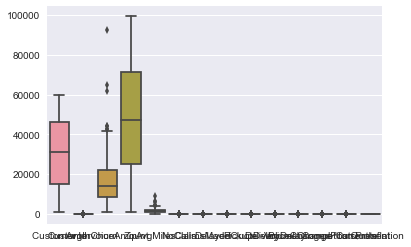

In [149]:
sns.boxplot(data=data)

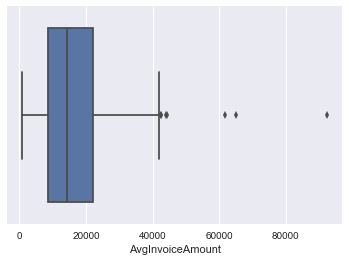

In [150]:
sns.boxplot(data['AvgInvoiceAmount']) # 

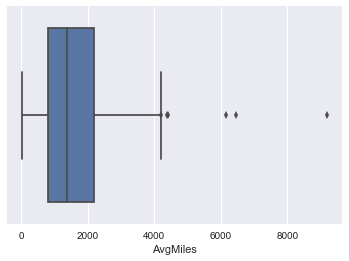

In [151]:
sns.boxplot(data['AvgMiles'])

##### Outlier Treatment: Avg Invoice Amount

In [152]:
quartile_1,quartile_3 = np.percentile(data.AvgInvoiceAmount ,[25,75])
inter_quartile_range = quartile_3 - quartile_1
lower_bound = quartile_1 - (inter_quartile_range * 1.5)
upper_bound = quartile_3 + (inter_quartile_range * 1.5)

In [153]:
outliers_avg_amount=  data[(data.AvgInvoiceAmount > upper_bound) | (data.AvgInvoiceAmount < lower_bound)]
outliers_avg_amount.replace(data.AvgInvoiceAmount.mean())

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation
57,30668,0,07-Jul-14,42553,"Wolfeboro Falls,New Hampshire",3896,4190.320729,0,0,0,0,0,0,0,0,1
327,13932,0,17-Jun-17,61803,"Lawai,Hawaii",96765,6145.281667,0,0,0,0,0,0,0,0,1
354,57694,0,23-Dec-15,65019,"Captain Cook,Hawaii",96704,6451.918204,0,0,0,0,0,0,0,0,0
457,24347,0,29-Sep-13,44383,"Albuquerque,New Mexico",87116,4413.343109,0,0,0,0,0,0,0,0,0
509,48013,0,14-Apr-17,92261,"Odessa,Washington",99159,9191.058795,0,0,0,0,0,0,0,0,1
552,6986,0,16-Mar-15,42618,"Nicholasville,Kentucky",40340,4211.832042,0,0,0,0,0,0,0,0,0
578,35189,0,07-Sep-14,43961,"San Diego,California",92114,4371.141460,0,0,0,0,0,0,0,0,1


#### Outlier Treatment: Avg Miles

In [154]:
quartile_1,quartile_3 = np.percentile(data.AvgMiles ,[25,75])
inter_quartile_range = quartile_3 - quartile_1
lower_bound = quartile_1 - (inter_quartile_range * 1.5)
upper_bound = quartile_3 + (inter_quartile_range * 1.5)

In [155]:
outliers_avg_miles=  data[(data.AvgMiles > upper_bound) | (data.AvgMiles < lower_bound)]
outliers_avg_miles.replace(data.AvgMiles.mean())

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation
327,13932,0,17-Jun-17,61803,"Lawai,Hawaii",96765,6145.281667,0,0,0,0,0,0,0,0,1
354,57694,0,23-Dec-15,65019,"Captain Cook,Hawaii",96704,6451.918204,0,0,0,0,0,0,0,0,0
457,24347,0,29-Sep-13,44383,"Albuquerque,New Mexico",87116,4413.343109,0,0,0,0,0,0,0,0,0
509,48013,0,14-Apr-17,92261,"Odessa,Washington",99159,9191.058795,0,0,0,0,0,0,0,0,1
552,6986,0,16-Mar-15,42618,"Nicholasville,Kentucky",40340,4211.832042,0,0,0,0,0,0,0,0,0
578,35189,0,07-Sep-14,43961,"San Diego,California",92114,4371.141460,0,0,0,0,0,0,0,0,1


In [156]:
churn_df = data.copy()

#### Feature Engineering: States

In [157]:
churn_df['States'] = (churn_df.LocationName.apply(lambda x:x.split(',')[-1])).apply(lambda y:y.rstrip()).apply(lambda y:y.lstrip())

In [158]:
churn_df['States'].tail()

595         Arkansas
596    New Hampshire
597            Texas
598               CA
599               CA
Name: States, dtype: object

Replacing and combining the abbrevations of the States' names with the States' names for easier and better description 

In [159]:
churn_df['States'] = churn_df.States.replace({'AL' : 'Alabama','AZ' : 'Arizona','CA':'California','FL':'Florida','GA':'Georgia',
                          'IL':'Illinois','MA':'Massachusetts','MI':'Michigan','OH':'Ohio','MO':'Missouri',
                          'PA':'Pennsylvania', 'NY': 'New York','TX':'Texas','WA':'Washington'})

In [160]:
churn_df['States'].tail()

595         Arkansas
596    New Hampshire
597            Texas
598       California
599       California
Name: States, dtype: object

All Set 

In [161]:
churn_df["LastInvoiceDate"].head()

0    05-Aug-14
1    17-Oct-17
2    31-Mar-16
3    17-Mar-14
4    05-May-14
Name: LastInvoiceDate, dtype: object

Note: The format is the problem or us. So, we need to change that. 

### Feature Engineering: Regions


In [162]:
region = {'Northeast':['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont','New Jersey', 
             'New York','Pennsylvania'],
'Midwest' :['Illinois', 'Indiana', 'Michigan', 'Ohio','Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 
            'Nebraska', 'North Dakota', 'South Dakota'],
'South' :['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 
     'West Virginia','Alabama', 'Kentucky', 'Mississippi',  'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma',  'Texas'],
'West' : ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',' Alaska', 'California', 'Hawaii', 
        'Oregon','Washington']}

In [163]:
def assign_region(x):
    for i in region:
        j='a'
        if(x in region[i]):
            j=i
        if(j!='a'):
            return(j)

In [164]:
churn_df['Region']=churn_df.States.apply(assign_region)

In [165]:
churn_df.Region.value_counts()

South        223
Midwest      160
Northeast    116
West         101
Name: Region, dtype: int64

In [166]:
churn_df.isna().sum()

Customer Id              0
CustomerChurn            0
LastInvoiceDate          0
AvgInvoiceAmount         0
LocationName             0
Zip                      0
AvgMiles                 0
NoCalls                  0
ClaimsMade               0
DelayedQuote             0
PickupDelay              0
DeliveryDelay            0
VolumeChange             0
PriceChangedPostQuote    0
CompetitorsPresent       0
CurrentInflation         0
States                   0
Region                   0
dtype: int64

#### Changing Date Format to YYYY-MM-DD format.

In [167]:
churn_df['LastInvoiceDate']=pd.to_datetime(churn_df.LastInvoiceDate)

In [168]:
churn_df.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,States,Region
0,26342,1,2014-08-05,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1,Illinois,Midwest
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1,New Mexico,West
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1,Ohio,Midwest
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0,California,West
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1,Florida,South


In [169]:
churn_df.to_csv("Amrut.csv")

# Exploratory Data Analysis

## Density Distribution Plot: "AvgInvoiceAmount"

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


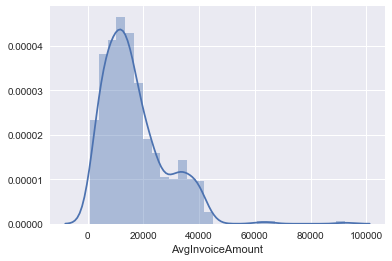

In [170]:
sns.distplot(churn_df.AvgInvoiceAmount)

Data Seem to be Right Skewed such that the customers have Avg Invoice value in the range of (0-40000) mainly

## Density Distribution Plot: "AvgMiles"

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


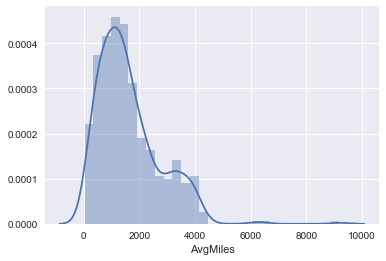

In [171]:
sns.distplot(churn_df.AvgMiles)

Data Seem to be Right Skewed here as well.

In [172]:
churn_one = churn_df[churn_df.CustomerChurn == 1 ]
churn_nil = churn_df[churn_df.CustomerChurn == 0 ]

### Data Exploration with Churn = 1 and Churn = 0

In [173]:
churn_one.count()

Customer Id              65
CustomerChurn            65
LastInvoiceDate          65
AvgInvoiceAmount         65
LocationName             65
Zip                      65
AvgMiles                 65
NoCalls                  65
ClaimsMade               65
DelayedQuote             65
PickupDelay              65
DeliveryDelay            65
VolumeChange             65
PriceChangedPostQuote    65
CompetitorsPresent       65
CurrentInflation         65
States                   65
Region                   65
dtype: int64

In [174]:
churn_nil.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,States,Region
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1,New Mexico,West
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1,Ohio,Midwest
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0,California,West
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1,Florida,South
5,50387,0,2016-09-01,12187,"Preston,Oklahoma",74456,1173.738409,0,0,1,1,1,0,0,0,1,Oklahoma,South


In [175]:
churn_one.describe()

,Customer Id,CustomerChurn,AvgInvoiceAmount,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation
count,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,32956.692308,1.0,14249.523077,50883.984615,1381.872162,2.338462,0.600000,0.415385,0.384615,0.215385,0.369231,0.323077,0.307692,0.307692
std,17387.649611,0.0,8994.291579,27604.195216,898.838710,1.761364,0.766485,0.496623,0.490290,0.414288,0.486352,0.471291,0.465130,0.465130
min,2365.000000,1.0,1992.000000,2150.000000,159.166759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18110.000000,1.0,7593.000000,30361.000000,699.319850,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31001.000000,1.0,11974.000000,48108.000000,1157.658395,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52530.000000,1.0,17980.000000,74368.000000,1758.954205,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,59536.000000,1.0,40451.000000,98001.000000,4005.137104,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
churn_nil.describe()

,Customer Id,CustomerChurn,AvgInvoiceAmount,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation
count,535.000000,535.0,535.000000,535.000000,535.000000,535.000000,535.0,535.000000,535.000000,535.000000,535.0,535.0,535.0,535.000000
mean,30402.229907,0.0,16919.327103,47848.992523,1649.195743,0.031776,0.0,0.013084,0.020561,0.009346,0.0,0.0,0.0,0.568224
std,17238.520466,0.0,11310.186883,27891.960054,1131.150464,0.175567,0.0,0.113741,0.142041,0.096311,0.0,0.0,0.0,0.495787
min,1127.000000,0.0,912.000000,1080.000000,31.218972,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,14937.500000,0.0,8914.500000,24716.000000,852.353431,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,30843.000000,0.0,14556.000000,47106.000000,1422.386134,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
75%,45910.000000,0.0,22677.500000,70677.000000,2221.857278,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,59887.000000,0.0,92261.000000,99402.000000,9191.058795,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


In [177]:
CP1 = data[data.CompetitorsPresent == 1]
CP1.describe()

,Customer Id,CustomerChurn,AvgInvoiceAmount,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation
count,20.00000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.00000
mean,37736.50000,1.0,15101.200000,55550.800000,1467.120403,2.000000,0.400000,0.450000,0.450000,0.400000,0.300000,0.200000,1.0,0.35000
std,15756.40277,0.0,9981.425869,31763.485628,1000.869093,2.026145,0.502625,0.510418,0.510418,0.502625,0.470162,0.410391,0.0,0.48936
min,2365.00000,1.0,6310.000000,2150.000000,571.010474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000
25%,29335.75000,1.0,8255.250000,32469.250000,765.544998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000
50%,40478.00000,1.0,12017.500000,54377.500000,1164.267972,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000
75%,52137.00000,1.0,15636.750000,86562.500000,1527.398815,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.00000
max,59536.00000,1.0,40451.000000,98001.000000,4005.137104,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000


In [178]:
Num_calls_0 = data[data.NoCalls == 0]
Num_calls_0.count()

Customer Id              531
CustomerChurn            531
LastInvoiceDate          531
AvgInvoiceAmount         531
LocationName             531
Zip                      531
AvgMiles                 531
NoCalls                  531
ClaimsMade               531
DelayedQuote             531
PickupDelay              531
DeliveryDelay            531
VolumeChange             531
PriceChangedPostQuote    531
CompetitorsPresent       531
CurrentInflation         531
dtype: int64

In [179]:
Num_calls_1 = data[data.NoCalls > 1]
Num_calls_1.count()

Customer Id              41
CustomerChurn            41
LastInvoiceDate          41
AvgInvoiceAmount         41
LocationName             41
Zip                      41
AvgMiles                 41
NoCalls                  41
ClaimsMade               41
DelayedQuote             41
PickupDelay              41
DeliveryDelay            41
VolumeChange             41
PriceChangedPostQuote    41
CompetitorsPresent       41
CurrentInflation         41
dtype: int64

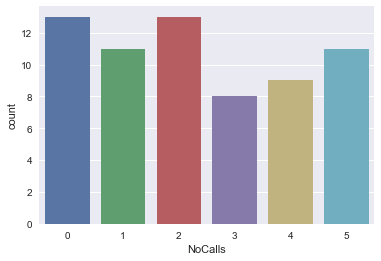

In [180]:
sns.countplot(churn_one.NoCalls)

## Distribution of Churn grouped by Number of Calls

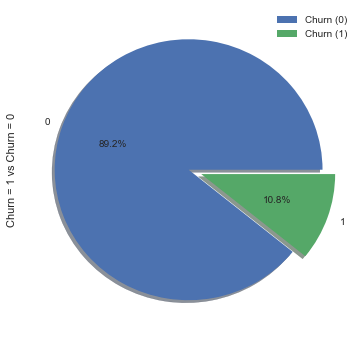

In [181]:
churn_df["CustomerChurn"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Churn = 1 vs Churn = 0")
plt.legend(["Churn (0)", "Churn (1)"])
plt.show()

## As seen above, The percentage of Customer Churn is 10.8%

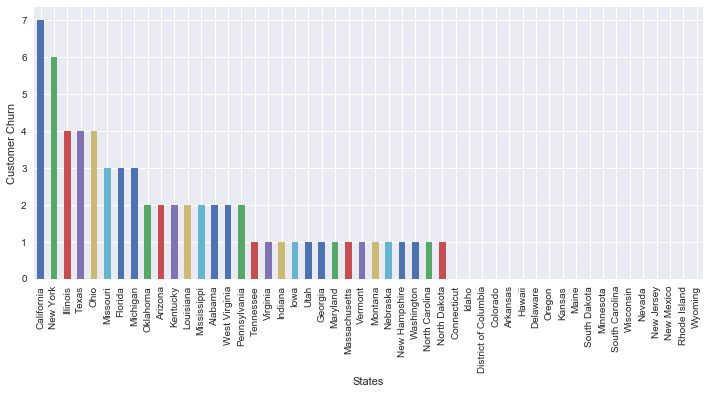

In [182]:
churn_df.CustomerChurn.groupby([churn_df.States]).sum().sort_values(ascending = False).plot(kind='bar',figsize = (12, 5))
plt.ylabel("Customer Churn")
plt.show()

## So, California, New York and illinois are the top 3 state with highest number of churns 

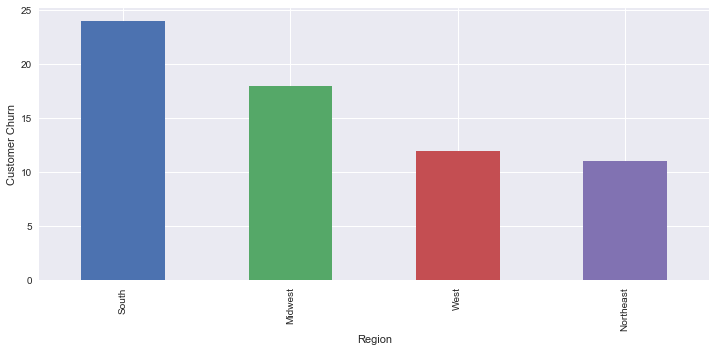

In [183]:
churn_df.CustomerChurn.groupby([churn_df.Region]).sum().sort_values(ascending = False).plot(kind='bar',figsize = (12, 5))
plt.ylabel("Customer Churn")
plt.show()

## Above Graph shows the Highest number of churn in the South Region.

Text(0,0.5,'Competitors Present')

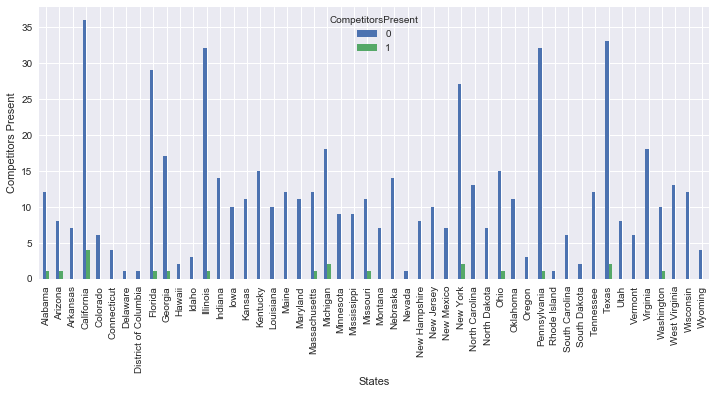

In [184]:
data_states_miles = pd.crosstab(churn_df.States,churn_df.CompetitorsPresent)
data_states_miles.plot(kind='bar',figsize = (12, 5))
plt.ylabel("Competitors Present")

##  The above graph indicates the competitors present in each state

#### Correlation HeatMap

In [185]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon
from statsmodels.stats.power import ttest_power

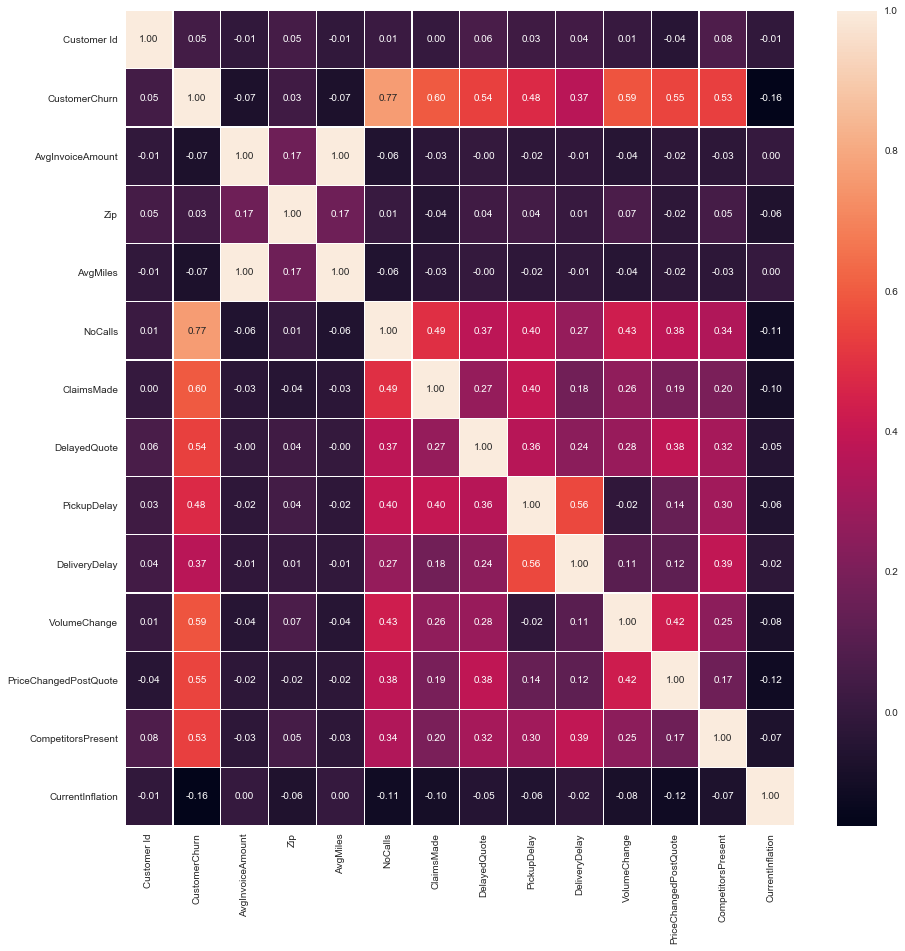

In [186]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(churn_df.corr(), annot=True, linewidths=0.2,linecolor="white", fmt= '.2f',ax=ax)
plt.show()

## Above Heat Correlation Map strongly suggest High Correlation between

* Avg Miles and Average Invoice Amount

* Number of Calls and Customer Churns

# Hypothesis Testing:

#### T-Test for Avg Invoice Amount

In [187]:
import sqlite3 as db
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [188]:
cus_data =churn_df.copy()

In [189]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon
from statsmodels.stats.power import ttest_power

In [190]:
AvgInvoice1=sqldf("SELECT AvgInvoiceAmount FROM cus_data WHERE CustomerChurn=1  ;")
AvgInvoice0=sqldf("SELECT AvgInvoiceAmount FROM cus_data WHERE CustomerChurn=0 ;")

t_statistic, p_value = ttest_ind(AvgInvoice0,AvgInvoice1)
print(t_statistic, p_value)

[1.83350886] [0.06722379]


Means are not same

#### T-test for Average Miles

In [191]:
AvgMiles1=sqldf("SELECT AvgMiles FROM cus_data WHERE CustomerChurn=1  ;")
AvgMiles0=sqldf("SELECT AvgMiles FROM cus_data WHERE CustomerChurn=0 ;")

t_statistic, p_value = ttest_ind(AvgMiles0,AvgMiles1)
print(t_statistic, p_value)

[1.83575171] [0.06689074]


means are not same so, t-test fails

### Contingency Table for No. of Calls and Customer Churn

In [192]:
from scipy.stats import chi2_contingency

In [193]:
cont_calls = pd.crosstab(cus_data["NoCalls"],
                   cus_data["CustomerChurn"])
cont_calls

CustomerChurn,0,1
NoCalls,,
0,518,13
1,17,11
2,0,13
3,0,8
4,0,9
5,0,11


In [194]:
chi2_contingency(cont_calls)

(399.57701098204825,
 3.6595747424364503e-84,
 5,
 array([[473.475     ,  57.525     ],
        [ 24.96666667,   3.03333333],
        [ 11.59166667,   1.40833333],
        [  7.13333333,   0.86666667],
        [  8.025     ,   0.975     ],
        [  9.80833333,   1.19166667]]))

### Contingency Table for Claims Made and Customer Churn

In [195]:
#Contengency Table
cont_claims = pd.crosstab(cus_data["ClaimsMade"],
                   cus_data["CustomerChurn"])
cont_claims

CustomerChurn,0,1
ClaimsMade,,
0,535,36
1,0,20
2,0,8
3,0,1


In [196]:
chi2_contingency(cont_claims)

(250.81503435268758,
 4.360591861886526e-54,
 3,
 array([[5.09141667e+02, 6.18583333e+01],
        [1.78333333e+01, 2.16666667e+00],
        [7.13333333e+00, 8.66666667e-01],
        [8.91666667e-01, 1.08333333e-01]]))

### Contingency Table for Delayed Quote and Customer Churn

In [197]:
cont_Dqelay = pd.crosstab(cus_data["DelayedQuote"],
                   cus_data["CustomerChurn"])
cont_Dqelay

CustomerChurn,0,1
DelayedQuote,,
0,528,38
1,7,27


In [198]:
chi2_contingency(cont_Dqelay)

(168.03341730795756,
 1.989308202199219e-38,
 1,
 array([[504.68333333,  61.31666667],
        [ 30.31666667,   3.68333333]]))

### Contingency Table for Pickup Delay and Customer Churn

In [199]:
cont_Pdelay = pd.crosstab(cus_data["PickupDelay"],
                   cus_data["CustomerChurn"])
cont_Pdelay



CustomerChurn,0,1
PickupDelay,,
0,524,40
1,11,25


In [200]:
chi2_contingency(cont_Pdelay)

(129.81935543080903, 4.488200083173315e-30, 1, array([[502.9,  61.1],
        [ 32.1,   3.9]]))

### Contingency Table for Delivery Delay and Customer Churn

In [201]:
#Contengency Table
cont_Ddelay = pd.crosstab(cus_data["DeliveryDelay"],
                   cus_data["CustomerChurn"])
cont_Ddelay



CustomerChurn,0,1
DeliveryDelay,,
0,530,51
1,5,14


In [202]:
chi2_contingency(cont_Ddelay)

(73.66063552600157,
 9.277063675653467e-18,
 1,
 array([[518.05833333,  62.94166667],
        [ 16.94166667,   2.05833333]]))

### Contingency Table for Volume Change and Customer Churn

In [203]:
#Contengency Table
cont_Vchange = pd.crosstab(cus_data["VolumeChange"],
                   cus_data["CustomerChurn"])
cont_Vchange

CustomerChurn,0,1
VolumeChange,,
0,535,41
1,0,24


In [204]:
chi2_contingency(cont_Vchange)

(196.26617541337166, 1.36355784896764e-44, 1, array([[513.6,  62.4],
        [ 21.4,   2.6]]))

### Contingency Table for Price Changed PostQuote and Customer Churn

In [205]:
cont_Pspq = pd.crosstab(cus_data["PriceChangedPostQuote"],
                   cus_data["CustomerChurn"])
cont_Pspq



CustomerChurn,0,1
PriceChangedPostQuote,,
0,535,44
1,0,21


In [206]:
chi2_contingency(cont_Pspq)

(169.67733249753493, 8.702432657485984e-39, 1, array([[516.275,  62.725],
        [ 18.725,   2.275]]))

### Contingency Table for Competitors Present and Customer Churn

In [207]:
cont_CP = pd.crosstab(cus_data["CompetitorsPresent"],
                   cus_data["CustomerChurn"])
cont_CP



CustomerChurn,0,1
CompetitorsPresent,,
0,535,45
1,0,20


In [208]:
chi2_contingency(cont_CP)

(160.87657106026427,
 7.27999848562826e-37,
 1,
 array([[517.16666667,  62.83333333],
        [ 17.83333333,   2.16666667]]))

### Contingency Table for Current Inflation and Customer Churn

In [209]:
cont_CI = pd.crosstab(cus_data["CurrentInflation"],
                   cus_data["CustomerChurn"])
cont_CI



CustomerChurn,0,1
CurrentInflation,,
0,231,45
1,304,20


In [210]:
chi2_contingency(cont_CI)

(14.8060165939077, 0.00011915473985382133, 1, array([[246.1,  29.9],
        [288.9,  35.1]]))

## Inferences 

### About the data.

* Looking at the data. We see there are no null values. 
* There are a very few outliers. Which have been taken care of.
* There is  little correlation between the independent variables.
* Heavy Class imbalance in the Target variable.

### Distribution of the Data.

* The continuous variables in the data have a right skewed distribution.
* After seperating the data into two dataframes based on customer churn, We found the same distribution of the continuous variabes.

### About the variables with respect to Target variable.

* The most number of calls made by a customer is atmost 5. We see 11 customers who have made 5 calls.
* Wee see that the customers who have made 2 or more than 2 calls have resulted in churn. More the number of calls the probbility of churn is greater.
* The customers who's product delivery was late have resulted in churn. The probability of churn is greater if the delivery was late.
* The customers who have made claims even once have resulted in churn.
* The customers who's product's Volume changed from ordering to delivery have resulted in churn. Although we see that out of all the customers who have reulted in churn, we see that the number of customers who's product volume did not change are more in number.
* Out of the customers who have resulted in churn. There are more number of customers who's pickup was not delayed. We see that if the Pickup is Delayed and Delivery is also delayed the customer churn is greater.
* The number of customers resulting in churn are more in number where the prices did not change post Quote. If the prices have changed the customers have resulted in churn.
* If there are no competitors present in absence of inflation, the custommer churn is higher than in the presence of inflation and competitors. 

* The state of Claifornia seems to have the most number of customer churn.
* Customer Churn is related to Average Invoice Amount and Avg Miles.

# RFM (Recency, Frequecy and Monetary Values)

### RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary).

In [211]:
dataframe = cus_data.copy()

#### Grouping by customers and checking last date of purchase

In [212]:
recency_df = dataframe.groupby(by='Customer Id', as_index=False)['LastInvoiceDate'].max()
recency_df.columns = ['Customer Id','LastPurchaseDate']
recency_df.head()

,Customer Id,LastPurchaseDate
0,1127,2016-05-12
1,1132,2015-06-19
2,1224,2016-06-01
3,1426,2016-06-13
4,1450,2017-11-11


### Calculating Recency Values

In [213]:
from datetime import date, datetime

In [214]:
now =datetime(2019,1,25)
print(now)

2019-01-25 00:00:00


In [215]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.head()

,Customer Id,LastPurchaseDate,Recency
0,1127,2016-05-12,988
1,1132,2015-06-19,1316
2,1224,2016-06-01,968
3,1426,2016-06-13,956
4,1450,2017-11-11,440


In [216]:
dataframe_copy = dataframe.copy()

### Calculating Frequency Values

In [217]:
frequency_df = dataframe_copy.groupby(by=['Customer Id'], as_index=False)['AvgInvoiceAmount'].count()
frequency_df.columns = ['Customer Id','Frequency']
frequency_df.head()

,Customer Id,Frequency
0,1127,1
1,1132,1
2,1224,1
3,1426,1
4,1450,1


### Calculating Monetary Values

In [218]:
monetary_df = dataframe.groupby(by='Customer Id',as_index=False)['AvgInvoiceAmount'].sum()
monetary_df.columns = ['Customer Id','Monetary']
monetary_df.head()

,Customer Id,Monetary
0,1127,19172
1,1132,3797
2,1224,13459
3,1426,2044
4,1450,15670


### Merging Tables:

In [219]:
temp_df = recency_df.merge(frequency_df,on="Customer Id",)
temp_df.head()

,Customer Id,LastPurchaseDate,Recency,Frequency
0,1127,2016-05-12,988,1
1,1132,2015-06-19,1316,1
2,1224,2016-06-01,968,1
3,1426,2016-06-13,956,1
4,1450,2017-11-11,440,1


In [220]:
rfm_df = temp_df.merge(monetary_df,on='Customer Id')
#check the head
rfm_df.head()

,Customer Id,LastPurchaseDate,Recency,Frequency,Monetary
0,1127,2016-05-12,988,1,19172
1,1132,2015-06-19,1316,1,3797
2,1224,2016-06-01,968,1,13459
3,1426,2016-06-13,956,1,2044
4,1450,2017-11-11,440,1,15670


### For Verification

In [221]:
rfm_df[rfm_df['Customer Id'] == 26342]

,Customer Id,LastPurchaseDate,Recency,Frequency,Monetary
253,26342,2014-08-05,1634,1,4935


### Assigning RFM Value levels

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency,

#### RFM Quartiles

In [222]:
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles

quantiles.to_dict()

{'Customer Id': {0.25: 15198.25, 0.5: 30755.5, 0.75: 45964.5},
 'Recency': {0.25: 855.75, 0.5: 1319.5, 0.75: 1745.5},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 8645.25, 0.5: 14450.5, 0.75: 22224.5}}

#### Creation of RFM Segments

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

In [223]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

##### Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict

In [224]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

### Creating RFM Segmentation Table

In [225]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

rfm_segmentation.head()

,Customer Id,LastPurchaseDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,1127,2016-05-12,988,1,19172,3,1,3
1,1132,2015-06-19,1316,1,3797,3,1,1
2,1224,2016-06-01,968,1,13459,3,1,2
3,1426,2016-06-13,956,1,2044,3,1,1
4,1450,2017-11-11,440,1,15670,4,1,3


In [226]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Customer Id,LastPurchaseDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1127,2016-05-12,988,1,19172,3,1,3,313
1,1132,2015-06-19,1316,1,3797,3,1,1,311
2,1224,2016-06-01,968,1,13459,3,1,2,312
3,1426,2016-06-13,956,1,2044,3,1,1,311
4,1450,2017-11-11,440,1,15670,4,1,3,413


#### Example for Recency,Frequency and Monetary Score of 4,1 and 2

In [227]:
rfm_segmentation[rfm_segmentation['RFMScore']=='412'].sort_values('Monetary', ascending=False).head(10)

,Customer Id,LastPurchaseDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
216,22423,2017-08-07,536,1,14423,4,1,2,412
146,15042,2016-11-14,802,1,14269,4,1,2,412
61,7076,2017-01-28,727,1,14099,4,1,2,412
145,15004,2017-05-03,632,1,13717,4,1,2,412
464,47389,2016-12-17,769,1,13683,4,1,2,412
28,3430,2017-02-01,723,1,13623,4,1,2,412
278,28821,2017-02-04,720,1,13531,4,1,2,412
466,47451,2016-11-15,801,1,13503,4,1,2,412
420,43479,2017-01-21,734,1,13340,4,1,2,412
255,26400,2017-05-12,623,1,13205,4,1,2,412


In [228]:
pd.merge(rfm_segmentation,cus_data,on='Customer Id').head()

,Customer Id,LastPurchaseDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerChurn,...,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,States,Region
0,1127,2016-05-12,988,1,19172,3,1,3,313,0,...,0,0,0,0,0,0,0,1,California,West
1,1132,2015-06-19,1316,1,3797,3,1,1,311,0,...,0,0,0,0,0,0,0,0,Pennsylvania,Northeast
2,1224,2016-06-01,968,1,13459,3,1,2,312,0,...,0,0,0,0,0,0,0,1,Kentucky,South
3,1426,2016-06-13,956,1,2044,3,1,1,311,0,...,0,0,0,0,0,0,0,1,Ohio,Midwest
4,1450,2017-11-11,440,1,15670,4,1,3,413,0,...,0,0,0,0,0,0,0,1,Maryland,South


### Conclusion: From above data we can say that RFM Segmentation is not valid in case of our Dataset as It has lack of Frequent Customers which is giving rise to inviable RFM segmentation.

## Switching from RFM to Unsupervised Learning Segmentation:

### K-Means Clustering


In [229]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_std=scaler.fit_transform(x)

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(x_std)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]





,num_clusters,cluster_errors
0,1,6000.000000
1,2,4596.125968
2,3,3842.080205
3,4,3257.007767
4,5,2842.548808
5,6,2440.915056
6,7,2197.314524
7,8,1997.939583
8,9,1896.505552


### Elbow plot for finding optimum number of clusters.

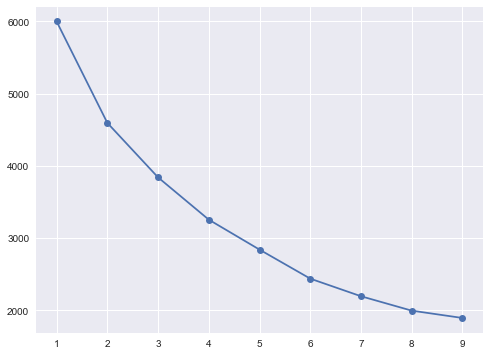

In [230]:
# Elbow plot
plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

##### Taking Number of clusters (k) = 2

In [231]:
kmeans = KMeans(n_clusters=2, n_init = 15,random_state=2345)
kmeans.fit(x_std)
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns=list(x) )
centroid_df

,-1.053798,-1.069243,-0.208229,-0.245093,-0.252646,-0.180838,-0.204124,-0.190445,-0.185695,0.922958
,0.692185,0.703611,-0.208229,4.080081,3.958114,5.529823,-0.204124,-0.190445,-0.185695,0.922958
,-0.968558,-0.947987,-0.208229,-0.245093,-0.252646,-0.180838,-0.204124,-0.190445,-0.185695,0.922958
,0.218768,0.221257,-0.208229,-0.245093,3.958114,5.529823,-0.204124,-0.190445,-0.185695,-1.083473
,-0.109668,-0.107144,-0.208229,-0.245093,-0.252646,-0.180838,-0.204124,-0.190445,-0.185695,0.922958
,-0.400350,-0.402293,-0.208229,4.080081,3.958114,5.529823,-0.204124,-0.190445,-0.185695,0.922958
,0.755079,0.739520,-0.208229,-0.245093,-0.252646,-0.180838,-0.204124,-0.190445,-0.185695,0.922958
,-0.656341,-0.676350,-0.208229,-0.245093,3.958114,5.529823,4.898979,-0.190445,5.385165,0.922958
,1.863742,1.884126,-0.208229,4.080081,3.958114,5.529823,-0.204124,-0.190445,-0.185695,0.922958
,-0.493429,-0.513393,-0.208229,-0.245093,-0.252646,-0.180838,-0.204124,-0.190445,-0.185695,0.922958
,0.205793,0.226330,-0.208229,4.080081,3.958114,5.529823,-0.204124,-0.190445,-0.185695,0.922958


In [232]:
cus_data['labels']=kmeans.labels_
cus_data.labels.value_counts()

0    542
1     58
Name: labels, dtype: int64

##### Here, Unsupervised Learning: K-means Clustering method is properly able to segment CustomerChurn data with 
    0 represents Customer not Churned
    1 represents Customer Churn

## Finding Important Variables

In [277]:
cus_data.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,States,Region,labels
0,26342,1,2014-08-05,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1,Illinois,Midwest,0
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1,New Mexico,West,1
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1,Ohio,Midwest,0
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0,California,West,1
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1,Florida,South,0


In [282]:
x_f = cus_data.drop(['NoCalls','CustomerChurn','LocationName','LastInvoiceDate','States','Customer Id','Zip','Region','labels'],axis=1)

In [284]:
y = cus_data[['CustomerChurn']]

In [286]:
X = x_f.copy()

### Pareto Approach

In [287]:
# Select top 40% of features

# Feature Selector
# Import
from sklearn.feature_selection import SelectPercentile, f_regression

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=40)

# Fit and transform
x_best = selector_f.fit_transform(X, y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [290]:
support = np.asarray(selector_f.get_support())

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 40%
features = np.asarray(X.columns.values)
features_with_support = features[support]
# print('Top 20% of the best, associated features to SalePrice\n',columns_with_support)
# print('Number of Features:', len(columns_with_support))

#f-scores of top 40%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 40%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 40%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)
# top20.index.name = 'Feature'
print('Top 40% best associated features to Customer Churn\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))

Top 40% best associated features to Customer Churn
Number of features: 4
                       F-score  p-value
ClaimsMade            3.32e+02 2.60e-59
VolumeChange          3.12e+02 1.61e-56
PriceChangedPostQuote 2.54e+02 5.39e-48
DelayedQuote          2.47e+02 7.13e-47


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# Model Building

## Classification Models

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [234]:
cc_data = cus_data.copy()

In [235]:
cc_data.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,States,Region,labels
0,26342,1,2014-08-05,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1,Illinois,Midwest,0
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1,New Mexico,West,1
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1,Ohio,Midwest,0
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0,California,West,1
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1,Florida,South,0


In [236]:
x = cc_data.drop(['NoCalls','CustomerChurn','LocationName','LastInvoiceDate','States','Customer Id','Zip','Region'],axis=1)
y = cc_data[['CustomerChurn']]

In [237]:
from scipy.stats  import zscore

In [238]:
x = zscore(x)

In [239]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.053798,-1.069243,-0.208229,-0.245093,-0.252646,-0.180838,-0.204124,-0.190445,-0.185695,0.922958,-0.327125
1,0.692185,0.703611,-0.208229,4.080081,3.958114,5.529823,-0.204124,-0.190445,-0.185695,0.922958,3.056931
2,-0.968558,-0.947987,-0.208229,-0.245093,-0.252646,-0.180838,-0.204124,-0.190445,-0.185695,0.922958,-0.327125
3,0.218768,0.221257,-0.208229,-0.245093,3.958114,5.529823,-0.204124,-0.190445,-0.185695,-1.083473,3.056931
4,-0.109668,-0.107144,-0.208229,-0.245093,-0.252646,-0.180838,-0.204124,-0.190445,-0.185695,0.922958,-0.327125


In [240]:
# x= independant Db and Y= Dependant Db
def classficationModelAccuracies(x, y):
    model1 = LogisticRegression()
    ## split data into train and test
    ## seed is key random value for starting algorithm
    seed = 7
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)
    ## Train the model with train data
    model1.fit(x_train, y_train)
    
    ## Train accuracies
    predictedClass = model1.predict(x_train)
    
    cMatrix = metrics.confusion_matrix(predictedClass, y_train)
    cMatrix
    # Classification accuracy
    trainClassificationAccuracy = (cMatrix[0][0] + cMatrix[1][1])/sum(sum(cMatrix))
    ## TP percentage
    trainTpPct = (cMatrix[1][1])/(cMatrix[1][0] + cMatrix[1][1])
    ## FP = Flase postive -> does not have disease but predicted as having disease
    # FP percentage
    trainFpPct = (cMatrix[0][1])/(cMatrix[0][0] + cMatrix[0][1])
    trainAccuracies = [len(y_train), trainClassificationAccuracy, trainTpPct, trainFpPct]
    
    ## Test accuracies
    predictedClass = model1.predict(x_test)
    cMatrix = metrics.confusion_matrix(predictedClass, y_test)
    cMatrix
    # Classification accuracy
    testClassificationAccuracy = (cMatrix[0][0] + cMatrix[1][1])/sum(sum(cMatrix))
    ## TP(TruePositive) percentage
    testTpPct = (cMatrix[1][1])/(cMatrix[1][0] + cMatrix[1][1])
    ## FP(FalsePositive) = Flase postive -> does not have disease but predicted as having disease
    # FP(FalsePositive) percentage
    testFpPct = (cMatrix[0][1])/(cMatrix[0][0] + cMatrix[0][1])
    testAccuracies = [len(y_test), testClassificationAccuracy, testTpPct, testFpPct]
    
    ## Results
    resultDf = pd.DataFrame(index = ["dataSize", "accuracy", "tpPct", "fpPct"])
    resultDf['train'] = trainAccuracies
    resultDf['test'] = testAccuracies
    from scipy import stats
    print(stats.ttest_ind(x_train,y_train))
    print(model1.intercept_)
    print(model1.coef_)   
    
    return(round(resultDf, 4))
#THe DF is Rounding off to 4 decimal places

In [241]:
classficationModelAccuracies(x, y)

Ttest_indResult(statistic=array([-2.78922033, -2.80653502, -1.49068685, -2.19905837, -1.60389802,
       -3.26952667, -2.24344802, -2.57241504, -3.09627949, -2.45120984,
       -2.29556643]), pvalue=array([0.00540334, 0.00512391, 0.13642002, 0.02814631, 0.10911333,
       0.00112121, 0.02512844, 0.01027031, 0.00202488, 0.01444095,
       0.02194685]))
[-2.97608449]
[[-0.27627805 -0.27445251  1.3233063  -0.0956641   0.51098717 -0.38440973
   1.43477131  1.12145483  1.19548685 -0.08135282  0.97564266]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,train,test
dataSize,420.0000,180.0000
accuracy,0.9905,0.9833
tpPct,0.9756,1.0000
fpPct,0.0079,0.0186


## Logistic Rergression

In [242]:
lr=LogisticRegression()

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)
lr.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [244]:
pred_prob=lr.predict_proba(x_test)[:,1]

In [245]:
import sklearn.metrics as metrics

In [246]:
metrics.roc_auc_score(y_test,pred_prob)

0.9692174913693901

In [247]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred_prob)

In [248]:
metrics.auc(fpr,tpr)

0.9692174913693901

In [249]:
met=(metrics.classification_report(y_test,lr.predict(x_test)))
print(met)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       158
          1       1.00      0.86      0.93        22

avg / total       0.98      0.98      0.98       180



In [250]:
recall=[]
precision=[]
pred=lr.predict_proba(x_test)[:,1]
for i in thresholds:
    pred1=np.where(pred>i,1,0)
    recall.append(metrics.recall_score(y_test,pred1))
    precision.append(metrics.precision_score(y_test,pred1))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


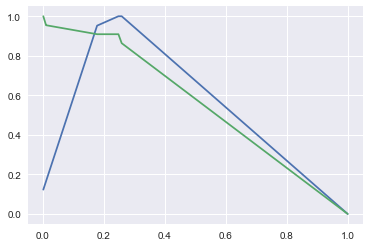

In [251]:
plt.plot(thresholds,precision)
plt.plot(thresholds,recall)

In [252]:
recall=[]
precision=[]
li=np.arange(.1,.25,.0001)
pred=lr.predict_proba(x_test)[:,1]
for i in li:
    pred1=np.where(pred<i,0,1)
    recall.append(metrics.recall_score(y_test,pred1))
    precision.append(metrics.precision_score(y_test,pred1))

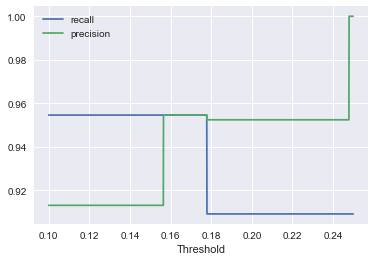

In [253]:
plt.plot(li,recall)
plt.plot(li,precision)
plt.xlabel('Threshold')
plt.legend(['recall','precision'])

In [254]:
np.where(lr.predict_proba(x_test)[:,1]<.16,0,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [255]:
print(metrics.classification_report(y_test,np.where(lr.predict_proba(x_test)[:,1]<.17,0,1)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       158
          1       0.95      0.95      0.95        22

avg / total       0.99      0.99      0.99       180



## Decision Tree

In [256]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [258]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [259]:
dt_pred=dt.predict(x_test)

In [260]:
print(metrics.classification_report(y_test,dt_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       158
          1       0.90      0.82      0.86        22

avg / total       0.97      0.97      0.97       180



In [261]:
print(metrics.classification_report(y_train,dt.predict(x_train)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       377
          1       1.00      0.86      0.92        43

avg / total       0.99      0.99      0.99       420



In [262]:
pred=dt.predict_proba(x_test)[:,1]
recall=[]
precision=[]
for i in np.arange(0,.2,0.01):
    pred1=np.where(pred<i,0,1)
    recall.append(metrics.recall_score(y_test,pred1))
    precision.append(metrics.precision_score(y_test,pred1))

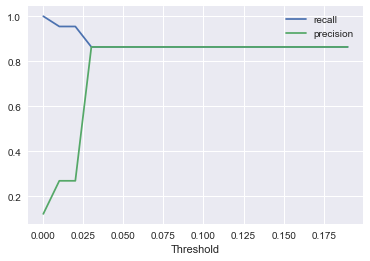

In [263]:
plt.plot(np.arange(0,.2,0.01),recall)
plt.plot(np.arange(0,.2,0.01),precision)
plt.xlabel('Threshold')
plt.legend(['recall','precision'])

## Naive Bayes

In [264]:
from sklearn.naive_bayes import GaussianNB

In [265]:
nb=GaussianNB()

In [266]:
nb.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [267]:
print(metrics.classification_report(y_test,nb.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       158
          1       0.91      0.91      0.91        22

avg / total       0.98      0.98      0.98       180



In [268]:
print(metrics.classification_report(y_train,nb.predict(x_train)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       377
          1       0.91      0.93      0.92        43

avg / total       0.98      0.98      0.98       420



## KNN 

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [270]:
KNN =KNeighborsClassifier(n_neighbors=3)

In [271]:
KNN.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [272]:
print(metrics.classification_report(y_test,KNN.predict(x_test)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       158
          1       1.00      0.82      0.90        22

avg / total       0.98      0.98      0.98       180



In [273]:
print(metrics.classification_report(y_train,KNN.predict(x_train)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       377
          1       0.97      0.86      0.91        43

avg / total       0.98      0.98      0.98       420



In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [275]:
models =[]
models.append(('LogisticRegression', LogisticRegression(random_state=1)))
models.append(('RandomForest', RandomForestClassifier(max_depth=5,random_state=1)))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=5,random_state=1)))
models.append(('NaiveBayes', GaussianNB()))
predictions=pd.DataFrame()
names=list()
precision=[]
recall=[]
f1=[]
auc=[]
results=[]
scoring = 'accuracy'
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=10)
for name, model in models:
    model.fit(xtrain,ytrain)
    predictions[name]=model.predict(xtest)
    recall.append(metrics.recall_score(ytest,predictions[name]))
    precision.append(metrics.precision_score(ytest,predictions[name]))
    f1.append(metrics.f1_score(ytest,predictions[name]))
    auc.append(metrics.roc_auc_score(ytest,predictions[name]))
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

LogisticRegression: 0.966667 (0.069522)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed whe

RandomForest: 0.970000 (0.036362)
DecisionTree: 0.953333 (0.055176)
NaiveBayes: 0.970000 (0.068638)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [276]:
Model_results=pd.DataFrame({'Model':names,'Recall':recall,'Precision':precision,'f1_score':f1,'AUC':auc,'Cross_val':results})
Model_results

,Model,Recall,Precision,f1_score,AUC,Cross_val
0,LogisticRegression,0.863636,1.00,0.926829,0.931818,0.966667
1,RandomForest,0.818182,1.00,0.900000,0.909091,0.970000
2,DecisionTree,0.772727,1.00,0.871795,0.886364,0.953333
3,NaiveBayes,0.863636,0.95,0.904762,0.928654,0.970000


# Hence, we can determine that: Naive Bayes is the best optimal model for this dataset with according to above analytics.